---
# Proyecto 2 Mineria de Datos

### Integrantes:
Benjamin Cordero\
Jaime Torres\
Camila Retamales\
Jose Flores\
Joaquin Cortes


---

In [165]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from datetime import timedelta
from sklearn.preprocessing import MinMaxScaler

In [166]:
# Base de Datos
filepath1 = os.getcwd() + os.path.sep + "application_record.csv"
filepath2 = os.getcwd() + os.path.sep + "credit_record.csv"
application_record = pd.read_csv(filepath1,delimiter=',')
credit_record = pd.read_csv(filepath2,delimiter=',')
# Observamos cuantos datos y columnas tenemos
print(f"DataFrame 1 de {application_record.shape[0]} filas y {application_record.shape[1]} columnas.")
print(f"DataFrame 2 de {credit_record.shape[0]} filas y {credit_record.shape[1]} columnas.")

DataFrame 1 de 438557 filas y 18 columnas.
DataFrame 2 de 1048575 filas y 3 columnas.


In [167]:
# Observamos la base de datos acerca de postulates a tarjetas de credito
application_record.head()
application_record.ID.nunique()

438510

## Analisis de variables


1. ID:	Numero de Cliente 	
2. CODE_GENDER: Genero 	
3. FLAG_OWN_CAR: Si tiene auto
4. FLAG_OWN_REALTY:	Si tiene una propiedad	
5. CNT_CHILDREN: Numero de hijos
6. AMT_INCOME_TOTAL: Sueldo anual
7. NAME_INCOME_TYPE: Tipo de Sueldo	
8. NAME_EDUCATION_TYPE: Nivel de educacion	
9. NAME_FAMILY_STATUS: Estado marital
10. NAME_HOUSING_TYPE: forma de pago de propiedad/vida	
11. DAYS_BIRTH: Dias que se encuentra vivo desde el dia 0(hoy) hacia atras -1 significa ayer.
12. DAYS_EMPLOYED: Dia que se inicia su trabajo se cuenta hacia atras 0(hoy) -1 ayer, si es positivo dias sin trabajo.
13. FLAG_MOBIL: Si tiene telefono movil
14. FLAG_WORK_PHONE: si tiene telefono de trabajo	
15. FLAG_PHONE: si tiene telefono fijo	
16. FLAG_EMAIL: si tiene email 	
17. OCCUPATION_TYPE: ocupacion
18. CNT_FAM_MEMBERS: cantidad de miembros familiares	


In [168]:
# Observamos la base de datos 
credit_record.head()
credit_record.ID.nunique()

45985

1. ID:	Numero de cliente 	
2. MONTHS_BALANCE:	Mes de registro El mes de los datos extraídos es el punto de partida, al revés, 0 es el mes actual, -1 es el mes anterior, etc.
3. STATUS:	Estado 0: 1-29 días de atraso 1: 30-59 días de atraso 2: 60-89 días de atraso 3: 90-119 días de atraso 4: 120-149 días de atraso 5: Atrasos o deudas incobrables, cancelaciones por más de 150 días C: pagado ese mes X: No hay préstamo para el mes

In [169]:
# analisamos la informacio de las columnas para ver si hay datos nulos
print(application_record.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [170]:
# analizamos los datos de la base de dato de resultados
print(credit_record.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB
None


In [171]:
# unimos las dos bases de datos en base al ID
data = application_record.merge(credit_record,how='inner',on=['ID'])
data.head(100)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-4,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-24,0
96,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-25,X
97,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-26,X
98,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0,C


In [172]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777715 entries, 0 to 777714
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   CODE_GENDER          777715 non-null  object 
 2   FLAG_OWN_CAR         777715 non-null  object 
 3   FLAG_OWN_REALTY      777715 non-null  object 
 4   CNT_CHILDREN         777715 non-null  int64  
 5   AMT_INCOME_TOTAL     777715 non-null  float64
 6   NAME_INCOME_TYPE     777715 non-null  object 
 7   NAME_EDUCATION_TYPE  777715 non-null  object 
 8   NAME_FAMILY_STATUS   777715 non-null  object 
 9   NAME_HOUSING_TYPE    777715 non-null  object 
 10  DAYS_BIRTH           777715 non-null  int64  
 11  DAYS_EMPLOYED        777715 non-null  int64  
 12  FLAG_MOBIL           777715 non-null  int64  
 13  FLAG_WORK_PHONE      777715 non-null  int64  
 14  FLAG_PHONE           777715 non-null  int64  
 15  FLAG_EMAIL       

In [173]:
# vemos los datos que son NaN
data.isna().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        240048
CNT_FAM_MEMBERS             0
MONTHS_BALANCE              0
STATUS                      0
dtype: int64

In [174]:
# analizamos la variable OCCUPATION_TYPE ya que es la unica que tiene valores nulos
data['OCCUPATION_TYPE'].value_counts()

Laborers                 131572
Core staff                77112
Sales staff               70362
Managers                  67738
Drivers                   47678
High skill tech staff     31768
Accountants               27223
Medicine staff            26691
Cooking staff             13416
Security staff            12400
Cleaning staff            11399
Private service staff      6714
Low-skill Laborers         3623
Secretaries                3149
Waiters/barmen staff       2557
HR staff                   1686
IT staff                   1319
Realty agents              1260
Name: OCCUPATION_TYPE, dtype: int64

In [175]:
# Revisamos si hay valores duplicados
data.duplicated().sum()

0

# Limpieza de datos

El unico valor que contiene NaN es OCCUPATION_TYPE, pero esto no es algo fue de lugar ya que simboliza que la persona no posee ninguna ocupacion.

# Analisis de los datos
Observando la base de datos, el problema a resolver es encontrar un modelo de prediccion que nos indique que persona sera aprobada para una tarjeta de credito.

/tmp/ipykernel_19597/1647964492.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


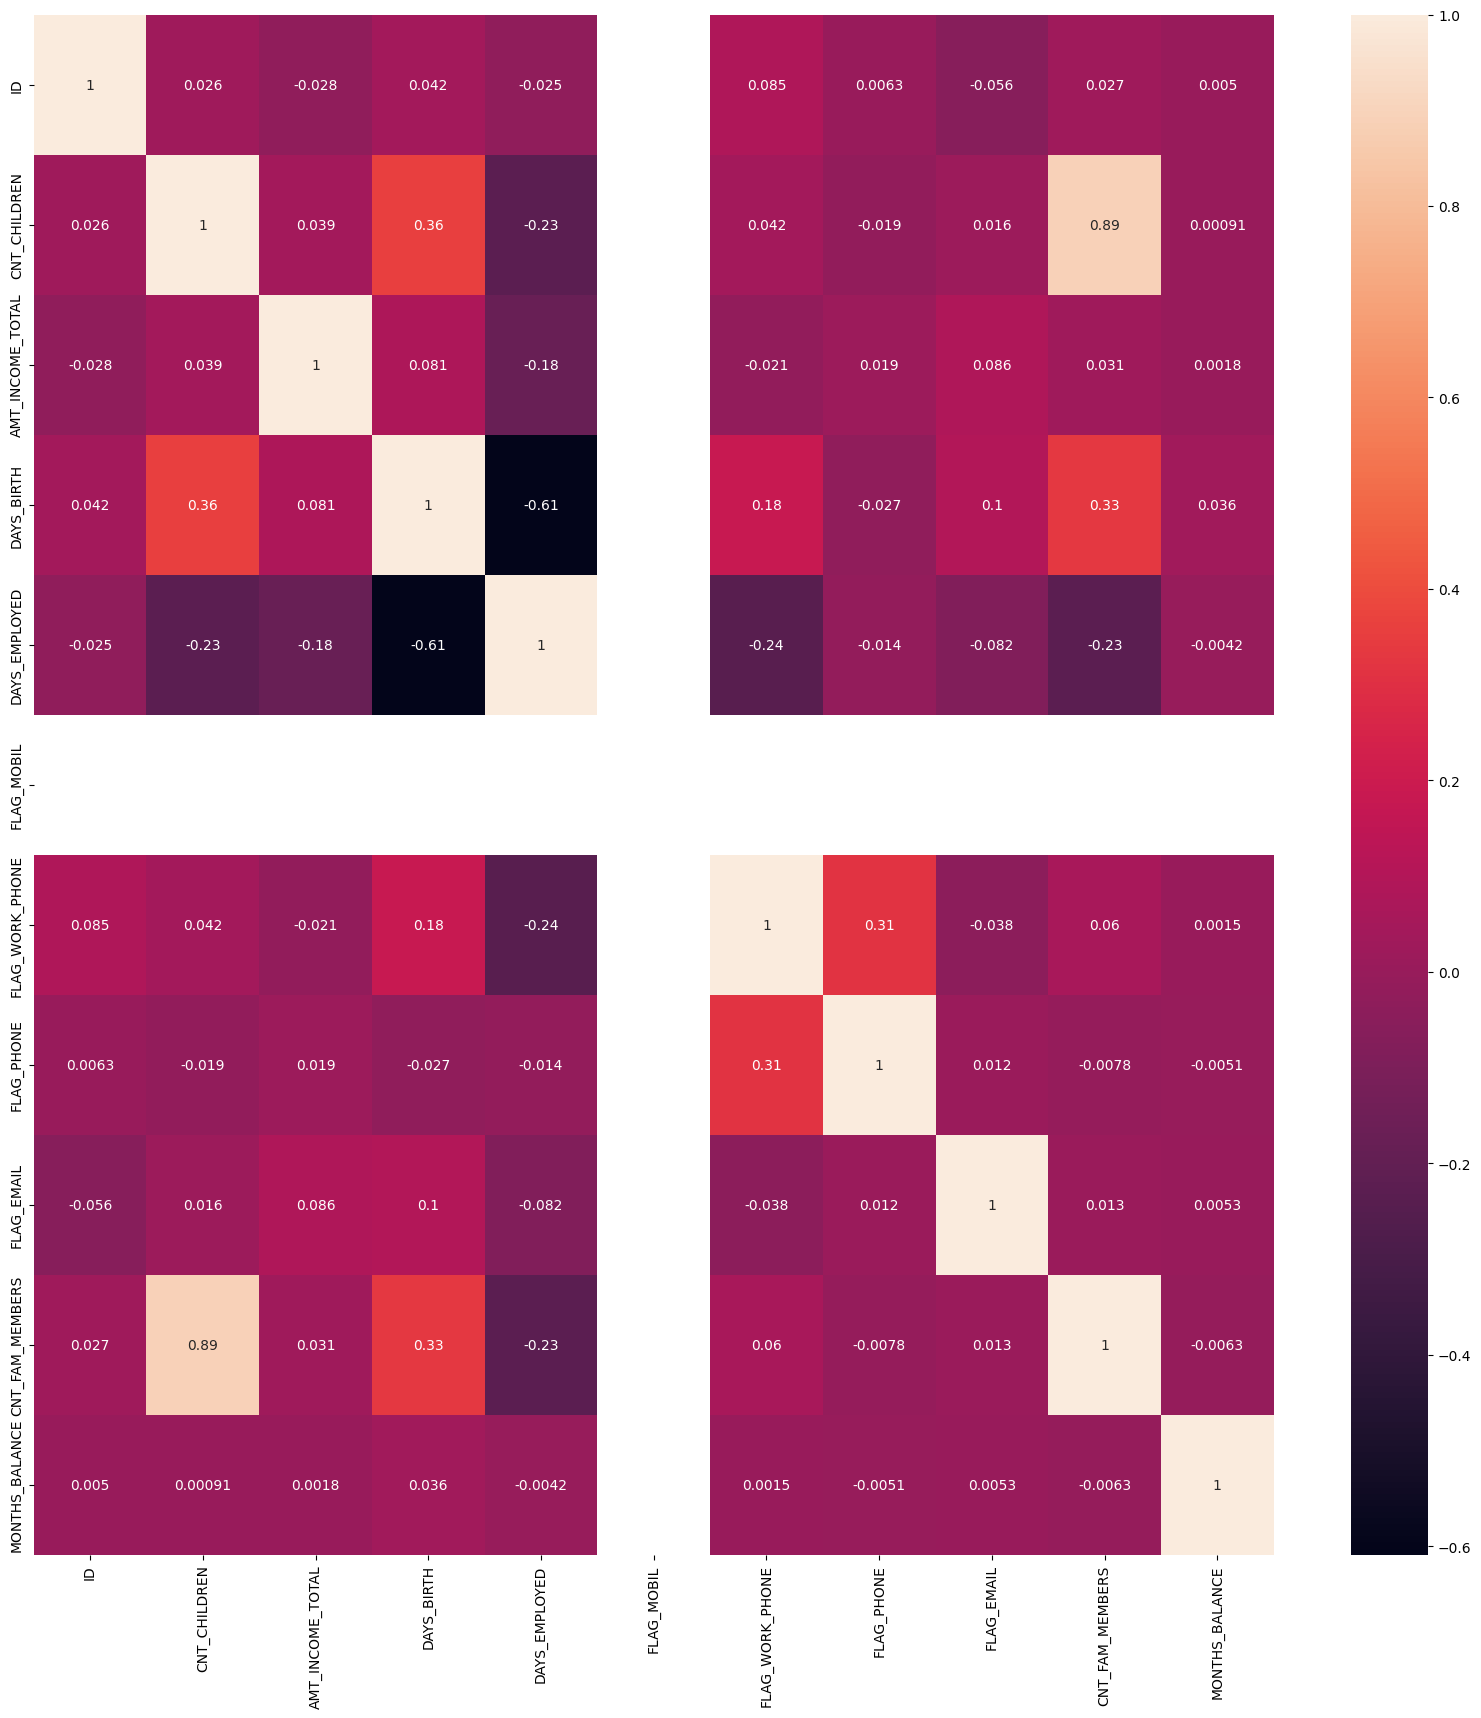

In [176]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=True)
plt.show()

Como podemos ver en el grafico de correlacion, FLAG_MOBIL no esta relacionada con ninguna otra columna por lo que nos deshacemos de esta.

/tmp/ipykernel_19597/3524299971.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


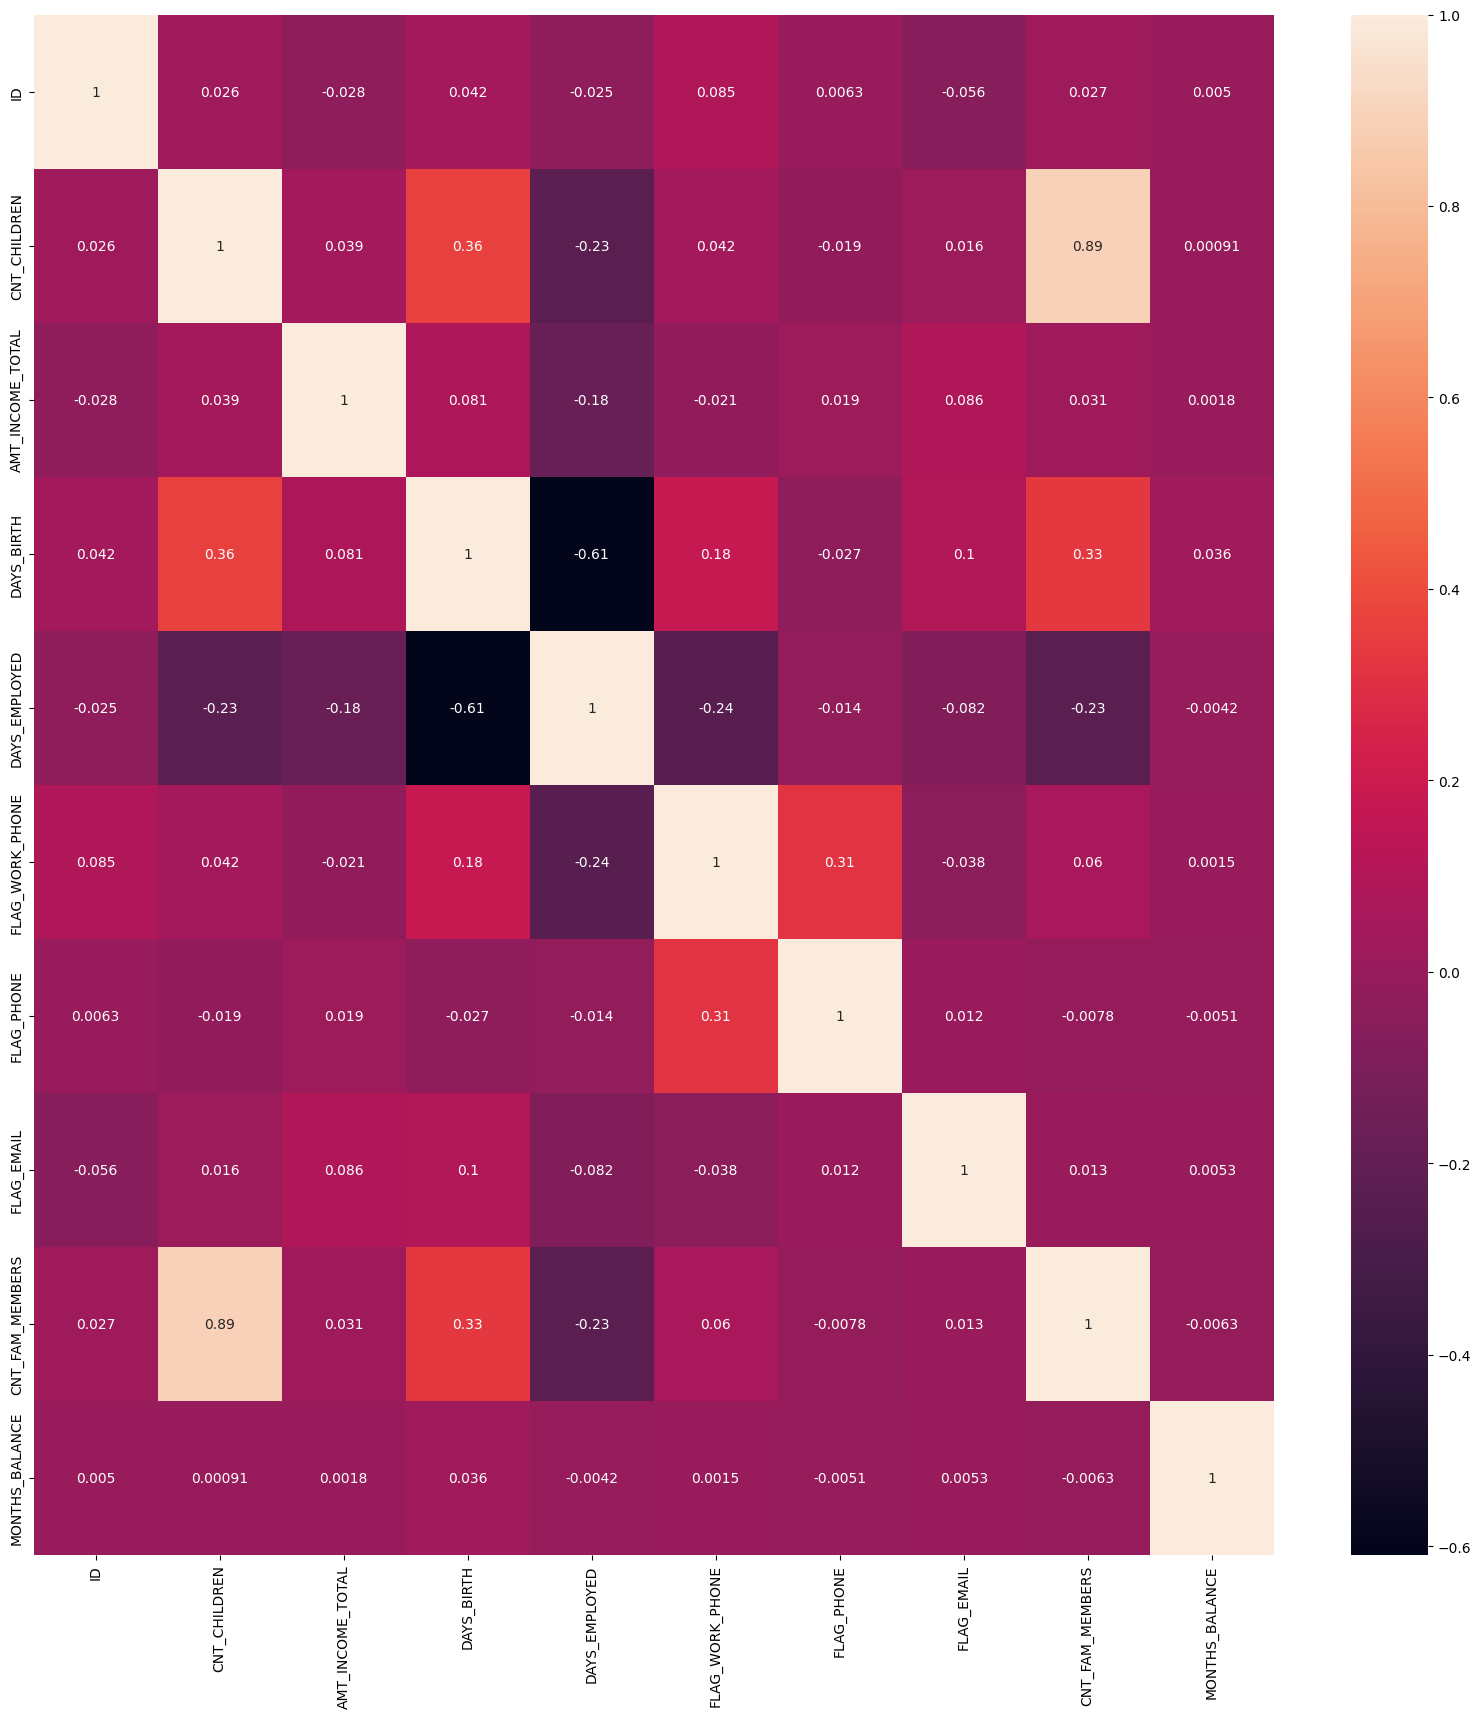

In [177]:
data = data.drop('FLAG_MOBIL',axis=1)
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [178]:
data['OCCUPATION_TYPE'].fillna('OTHER',inplace=True)
data.isnull().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
MONTHS_BALANCE         0
STATUS                 0
dtype: int64

Rellenamos OCCUPATION_TYPE para que no tenga valores NaN con OTHER, con esto ya no tenemos valores nulos.

In [179]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777715 entries, 0 to 777714
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   CODE_GENDER          777715 non-null  object 
 2   FLAG_OWN_CAR         777715 non-null  object 
 3   FLAG_OWN_REALTY      777715 non-null  object 
 4   CNT_CHILDREN         777715 non-null  int64  
 5   AMT_INCOME_TOTAL     777715 non-null  float64
 6   NAME_INCOME_TYPE     777715 non-null  object 
 7   NAME_EDUCATION_TYPE  777715 non-null  object 
 8   NAME_FAMILY_STATUS   777715 non-null  object 
 9   NAME_HOUSING_TYPE    777715 non-null  object 
 10  DAYS_BIRTH           777715 non-null  int64  
 11  DAYS_EMPLOYED        777715 non-null  int64  
 12  FLAG_WORK_PHONE      777715 non-null  int64  
 13  FLAG_PHONE           777715 non-null  int64  
 14  FLAG_EMAIL           777715 non-null  int64  
 15  OCCUPATION_TYPE  

# Manipulacion del dataset

Esta manipulacion entregara una mejor performance al momento de aplicar nuestros modelos supervisados.

## Cambio de variables binarias
Las variables CODE_GENDER, FLAG_OWN_CAR y FLAG_OWN_REALITY son variables binarias, por lo que se deben transformar a 0 y 1 respectivamente.

## Simplificacion de variables
En las variables NAME_EDUCATION_TYPE Y NAME_FAMILY_STATUS, se pueden observar valores como "Secondary / secondary special" y "Single / not married" estas se simplificaran a "secondary" y "single" respectivamente.

Las variables DAYS_BIRTH y DAYS_EMPLOYED son variables de fecha las cuales estan en formato de dias, por lo que se transformaran a un formato de fecha. Tambien se creara apartir de estas una columna "AGE" la cual entregara la edad del postulante y reemplazara la columna DAYS_BIRTH, tambien se creara

La variable STATUS se modifica cambiando los valores de C y X a 6 y 7 y luego se filtran los valores de las categorias en Risky para valores 2,3,4 y 5 y Not Risky para el resto de los valores, de esta manera queda binaria la variable.

botamos la variable OCCUPATION_TYPE ya que no es relevante saber el tipo de trabajo que tiene el postulante.

## Referencia
[Credit Card Approval Analisis](https://www.kaggle.com/code/saurav12suman/credit-card-approval#Feature-Engineering)



In [180]:
# Cambiamos estas columnas a binario
male = pd.get_dummies(data['CODE_GENDER'],drop_first=True)
car = pd.get_dummies(data['FLAG_OWN_CAR'],drop_first=True)
Property = pd.get_dummies(data['FLAG_OWN_REALTY'],drop_first=True)

male = male.rename({'M': 'IS_MALE'}, axis=1)
car = car.rename({'Y': 'HAS_CAR'}, axis=1)
Property = Property.rename({'Y': 'HAS_PROPERTY'}, axis=1)

data.drop(['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY'],inplace=True,axis=1)

# Simplificacion de variables

#estas funciones renombran algunos de
#las valores de las variables NAME_EDUCATION_TYPE Y NAME_FAMILY_ESTATUS
def education(x):
    if x=='Secondary / secondary special':
        x=x.split(' / ')[0]
    return x

data['NAME_EDUCATION_TYPE']=data['NAME_EDUCATION_TYPE'].apply(education)
def fun(x):
    if x=='Single / not married':
        x=x.split(' / ')[0]
    return x

data['NAME_FAMILY_STATUS']=data['NAME_FAMILY_STATUS'].apply(fun)

# Esta funcion cambia los valres de DAYS_BIRTH a formato datetime
def Date_of_Birth(total_days):
    today = datetime.date.today()
    birthday = (today + timedelta(days=total_days)).strftime('%Y-%m-%d')
    return birthday                  

# Esta funcion toma los valores de DAYS_EMPLOYED y los convierte al formato datetime
def Employed_day(total_days):
    today = datetime.date.today()
    employed_date = (today + datetime.timedelta(days=total_days)).strftime('%Y-%m-%d')

data['DAYS_BIRTH']=data['DAYS_BIRTH'].apply(Date_of_Birth)
data['DAYS_EMPLOYED']=data['DAYS_EMPLOYED'].apply(Date_of_Birth)

#Esta funcion calcula la edad del postulante
def AGE(date_of_birth):
    today=datetime.date.today()
    dateofbirth=datetime.datetime.strptime(date_of_birth,'%Y-%m-%d')
    age=today.year-dateofbirth.year
    return age

data['DAYS_BIRTH']=data['DAYS_BIRTH'].apply(AGE)
data['DAYS_EMPLOYED']=data['DAYS_EMPLOYED'].apply(AGE)

# Se cambia el nombre de las columnas a uno mas relevante
data = data.rename({'DAYS_BIRTH': 'AGE', 'DAYS_EMPLOYED': 'DAYS_WORKED'}, axis=1)

# se cambian los valores de C y X para poder manipularlos
data.loc[data['STATUS']=='C','STATUS']=6
data.loc[data['STATUS']=='X','STATUS']=7
data['STATUS']=data['STATUS'].astype(float)


# Esta funcion define el estatus como RISKY si estan en los siguientes valores de 2,3,4,5 y el resto
# los define como no risky
def solve(state):
    target=''
    if state in (2,3,4,5):
        target=1 #Risky
    else :
        target=0 #not Risky
        
    return target
data['TARGET']=data['STATUS'].apply(solve)


data = pd.concat([data,male,car,Property],axis=1)



In [181]:
data.head()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,DAYS_WORKED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,TARGET,IS_MALE,HAS_CAR,HAS_PROPERTY
0,5008804,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32,12,1,0,0,OTHER,2.0,0,6.0,0,1,1,1
1,5008804,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32,12,1,0,0,OTHER,2.0,-1,6.0,0,1,1,1
2,5008804,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32,12,1,0,0,OTHER,2.0,-2,6.0,0,1,1,1
3,5008804,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32,12,1,0,0,OTHER,2.0,-3,6.0,0,1,1,1
4,5008804,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32,12,1,0,0,OTHER,2.0,-4,6.0,0,1,1,1


# Scaling de la variables (Feature Scaling)

Se transformara toda la data a una escala, para esto cambiaremos la data categorica a numerica.

In [182]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777715 entries, 0 to 777714
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   CNT_CHILDREN         777715 non-null  int64  
 2   AMT_INCOME_TOTAL     777715 non-null  float64
 3   NAME_INCOME_TYPE     777715 non-null  object 
 4   NAME_EDUCATION_TYPE  777715 non-null  object 
 5   NAME_FAMILY_STATUS   777715 non-null  object 
 6   NAME_HOUSING_TYPE    777715 non-null  object 
 7   AGE                  777715 non-null  int64  
 8   DAYS_WORKED          777715 non-null  int64  
 9   FLAG_WORK_PHONE      777715 non-null  int64  
 10  FLAG_PHONE           777715 non-null  int64  
 11  FLAG_EMAIL           777715 non-null  int64  
 12  OCCUPATION_TYPE      777715 non-null  object 
 13  CNT_FAM_MEMBERS      777715 non-null  float64
 14  MONTHS_BALANCE       777715 non-null  int64  
 15  STATUS           

## Las siguientes variables no son numericas
```
3   NAME_INCOME_TYPE     777715 non-null  object 
```
```
4   NAME_EDUCATION_TYPE  777715 non-null  object 
```
```
5   NAME_FAMILY_STATUS   777715 non-null  object 
```
```
6   NAME_HOUSING_TYPE    777715 non-null  object
```

In [183]:
# Creamos diccionarios para transformar las variables a numeros

lst = {'Working': 1, 'Commercial associate': 2,
       'Pensioner': 3, 'State servant': 4, 'Student': 5}
lst1 = {'Secondary': 1, 'Higher education': 2, 'Incomplete higher': 3,
        'Lower secondary': 4, 'Academic degree': 5}
lst2 = {'Married': 1, 'Single': 2,
        'Civil marriage': 3, 'Separated': 4, 'Widow': 5}
lst3 = {'House / apartment': 1, 'With parents': 2, 'Municipal apartment': 3,
        'Rented apartment': 4, 'Office apartment': 5, 'Co-op apartment': 6}
lst4 = {'Laborers': 1,
        'Core staff': 2,
        'Sales staff': 3,
        'Managers': 4,
        'Drivers': 5,
        'High skill tech staff': 6,
        'Accountants': 7,
        'Medicine staff': 8,
        'Cooking staff': 9,
        'Security staff': 10,
        'Cleaning staff': 11,
        'Private service staff': 12,
        'Low-skill Laborers': 13,
        'Secretaries': 14,
        'Waiters/barmen staff': 15,
        'HR staff': 16,
        'IT staff': 17,
        'Realty agents': 18,
        'OTHER': 19}
# Reemplazamos los valores en las columnas
data.replace({'NAME_INCOME_TYPE': lst}, inplace=True)
data.replace({'NAME_EDUCATION_TYPE': lst1}, inplace=True)
data.replace({'NAME_FAMILY_STATUS': lst2}, inplace=True)
data.replace({'NAME_HOUSING_TYPE': lst3}, inplace=True)
data.replace({'OCCUPATION_TYPE': lst4}, inplace=True)
data.head()


,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,DAYS_WORKED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,TARGET,IS_MALE,HAS_CAR,HAS_PROPERTY
0,5008804,0,427500.0,1,2,3,4,32,12,1,0,0,19,2.0,0,6.0,0,1,1,1
1,5008804,0,427500.0,1,2,3,4,32,12,1,0,0,19,2.0,-1,6.0,0,1,1,1
2,5008804,0,427500.0,1,2,3,4,32,12,1,0,0,19,2.0,-2,6.0,0,1,1,1
3,5008804,0,427500.0,1,2,3,4,32,12,1,0,0,19,2.0,-3,6.0,0,1,1,1
4,5008804,0,427500.0,1,2,3,4,32,12,1,0,0,19,2.0,-4,6.0,0,1,1,1


In [184]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777715 entries, 0 to 777714
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   CNT_CHILDREN         777715 non-null  int64  
 2   AMT_INCOME_TOTAL     777715 non-null  float64
 3   NAME_INCOME_TYPE     777715 non-null  int64  
 4   NAME_EDUCATION_TYPE  777715 non-null  int64  
 5   NAME_FAMILY_STATUS   777715 non-null  int64  
 6   NAME_HOUSING_TYPE    777715 non-null  int64  
 7   AGE                  777715 non-null  int64  
 8   DAYS_WORKED          777715 non-null  int64  
 9   FLAG_WORK_PHONE      777715 non-null  int64  
 10  FLAG_PHONE           777715 non-null  int64  
 11  FLAG_EMAIL           777715 non-null  int64  
 12  OCCUPATION_TYPE      777715 non-null  int64  
 13  CNT_FAM_MEMBERS      777715 non-null  float64
 14  MONTHS_BALANCE       777715 non-null  int64  
 15  STATUS           

Nuestra data contiene solo variables numericas.

In [185]:
#utilizaremos solo 10000 datos para nuestro problema
# El minimo de datos que nos piden para la muestra
# Si se incrementan los datos toma demasiado tiempo en 
data = data.sample(n=10000, random_state=1)

x=data.drop('TARGET',axis=1)
y=data['TARGET']
feature_scale = [feature for feature in data.columns if feature!='TARGET']
scaler=MinMaxScaler()
scaler.fit_transform(x)

data = pd.concat([data['TARGET'].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(x), columns=feature_scale)],
                    axis=1)

data.head()

,TARGET,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,DAYS_WORKED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,IS_MALE,HAS_CAR,HAS_PROPERTY
0,0,0.090884,0.071429,0.180328,0.00,0.5,0.0,0.0,0.319149,0.959693,0.0,0.0,0.0,0.166667,0.142857,0.683333,0.857143,1.0,1.0,1.0
1,0,0.941528,0.000000,0.401639,0.75,0.0,0.0,0.0,0.404255,0.967370,0.0,0.0,0.0,0.000000,0.071429,0.200000,0.857143,1.0,1.0,1.0
2,0,0.197678,0.000000,0.038934,0.50,0.0,0.5,0.0,0.893617,0.000000,0.0,1.0,0.0,1.000000,0.071429,0.266667,0.857143,0.0,0.0,1.0
3,0,0.773044,0.071429,0.049180,0.00,0.0,0.0,0.0,0.425532,0.964491,1.0,0.0,0.0,1.000000,0.142857,0.616667,1.000000,0.0,1.0,0.0
4,0,0.745262,0.000000,0.057377,0.00,0.0,0.0,0.0,0.638298,0.983685,0.0,0.0,0.0,0.444444,0.071429,0.133333,0.857143,0.0,0.0,0.0


In [186]:
data.TARGET.value_counts()

0    9969
1      31
Name: TARGET, dtype: int64

Observando el valor de TARGET, se puede apreciar que 774887 datos estan dentro de la categoria "risky" y solo 2828 son "Not Risky", por lo que se puede inferir que la data es inbalanceada, por lo que tendremos que recurrir a un metodo de oversampling/undersampling para nivelarla.
En este caso utilizaremos oversampling, ya que undersampling eliminaria la mayoria de nuestros datos.

In [187]:
from imblearn.combine import SMOTETomek
smk=SMOTETomek(random_state=6)
# Hacemos el oversampling de los datos
x_res,y_res=smk.fit_resample(x,y)
print(x_res.shape)
print(y_res.shape)

(19722, 19)
(19722,)


In [188]:
from collections import Counter

print('original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

original dataset shape Counter({0: 9969, 1: 31})
Resampled dataset shape Counter({0: 9861, 1: 9861})


# Aplicamos el modelo

In [189]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=0.2,random_state=567)
x_train.shape,y_train.shape

((15777, 19), (15777,))

In [190]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score, classification_report

El modelo es:  <class 'sklearn.linear_model._logistic.LogisticRegression'>
              precision    recall  f1-score   support

           0       0.51      0.51      0.51      1985
           1       0.51      0.51      0.51      1960

    accuracy                           0.51      3945
   macro avg       0.51      0.51      0.51      3945
weighted avg       0.51      0.51      0.51      3945

El modelo es:  <class 'sklearn.naive_bayes.GaussianNB'>
              precision    recall  f1-score   support

           0       0.84      0.47      0.60      1985
           1       0.63      0.91      0.74      1960

    accuracy                           0.69      3945
   macro avg       0.73      0.69      0.67      3945
weighted avg       0.73      0.69      0.67      3945

El modelo es:  <class 'sklearn.neighbors._classification.KNeighborsClassifier'>
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1985
           1       0.93   

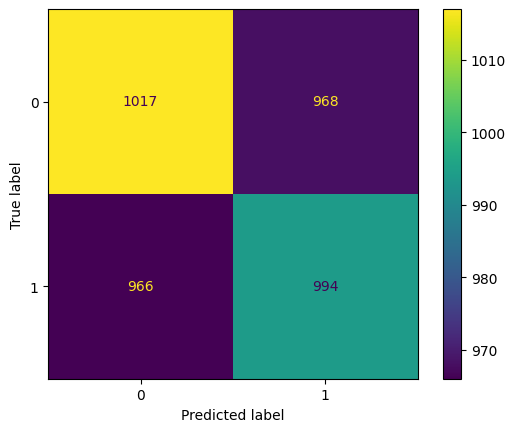

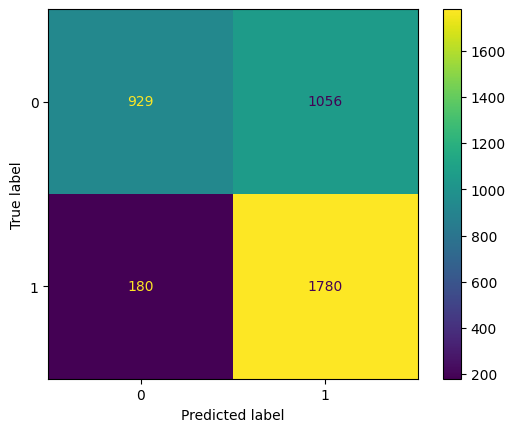

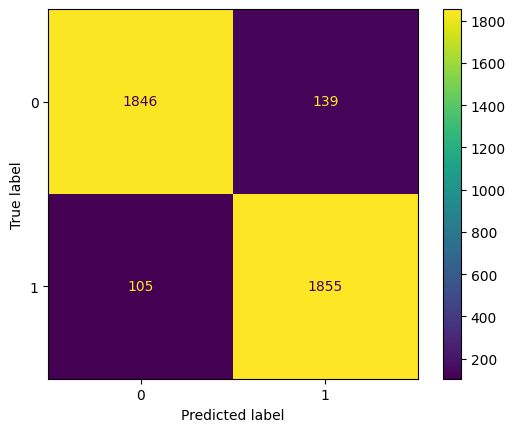

In [191]:
model_list=[LogisticRegression,GaussianNB,KNeighborsClassifier]

accuracy =[]
for model in model_list :
    print("El modelo es: ",model)
    model = model()
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
    print(classification_report(y_test, y_pred))
    accuracy.append(accuracy_score(y_test,y_pred))
print("El porcentaje de 'accuracy' para los tres modelos es: ",accuracy)



Como se puede apreciar por las matrices de confusion, el modelo KNN es el que arrojo una mejor prediccion de el output de los datos con un 93% de precision en comparacion al 50% de regresion logistica y 68% de naive bayes.

en el grafico de confusion de KNN se puede observar que el modelo predijo 139 un dato "not risky" como "risky" y 105 veces un dato "risky" como "not risky", muy por debajo de los otros dos modelos.